Demolitions analysis w/ Pandas

In [94]:
import pandas as pd
import altair as alt

## Imports

- demolitions is the data after download, etc.

In [95]:
column_types = {
    "ApplicantPhone": pd.np.str,
    "ContractorPhone": pd.np.str,
    'CalendarYearIssued': pd.np.str,
}

# import raw data
data_raw = pd.read_csv(
    '../data-processed/demolitions.csv',
    index_col=None,
    dtype=column_types
)

# set df after and changes
demolitions = data_raw

## Residential vs Commercial

In [96]:
# show residential vs commercial
demolitions.PermitClassMapped.value_counts()

Residential    10361
Commercial       809
Name: PermitClassMapped, dtype: int64

In [97]:
# filter to just residential and just commercial
# so I can deal with them seperately
residential = demolitions[demolitions['PermitClassMapped'] == 'Residential']
commercial = demolitions[demolitions['PermitClassMapped'] == 'Commercial']

## Demo Type
Partial vs Full demo
- I did test that residential permits marked as "Partial" do not have PermitClass for full demo.

In [98]:
residential['DemoType'].value_counts()

Partial    5655
Full       4706
Name: DemoType, dtype: int64

In [99]:
# check PermitClass in partial demos
# looking for 645 or 646, which are full demos
partial = residential[residential['DemoType'] == "Partial"]
partial['PermitClass'].value_counts()

R- 434 Addition & Alterations             4993
R- 435 Renovations/Remodel                 588
R- 329 Res Structures Other Than Bldg       18
R- 330  Accessory Use to Primary            17
R- 101 Single Family Houses                 15
R- 438 Residential Garage/Carport Addn      11
R- 102 Secondary Apartment                   9
R- 103 Two Family Bldgs                      2
R- 437 Residential Boat Dock                 1
R- 436 Addn to increase housing units        1
Name: PermitClass, dtype: int64

In [100]:
# check full DemoType Full for different
# PermitClass values
full = residential[residential['DemoType'] == "Full"]
full['PermitClass'].value_counts()

R- 645 Demolition One Family Homes       3012
R- 649 Demolition All Other Bldgs Res    1574
R- 646 Demolition Two Family Bldgs        120
Name: PermitClass, dtype: int64

In [101]:
# this gets full_demo_homes, which are permits specifically
# to demolish single family or dual family homes
full_home_demos = residential[
    (residential['PermitClass'] == "R- 645 Demolition One Family Homes")
    | (residential['PermitClass'] == "R- 646 Demolition Two Family Bldgs")
]

##  More on full home demos

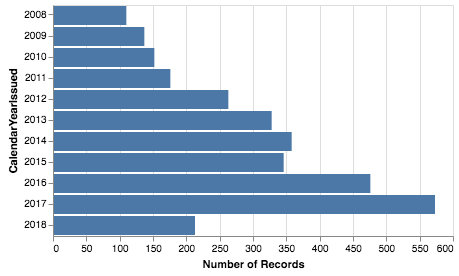

In [105]:
alt.Chart(full_home_demos).mark_bar().encode(
    x="count()",
    y="CalendarYearIssued"
)

## References

Keeping for column referencesand such. Ignore.

In [103]:
demolitions.info()
demolitions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11170 entries, 0 to 11169
Data columns (total 67 columns):
PermitType                    11170 non-null object
PermitTypeDesc                11170 non-null object
PermitNum                     11170 non-null object
PermitClassMapped             11170 non-null object
PermitClass                   11170 non-null object
WorkClass                     11170 non-null object
Condominium                   11170 non-null object
ProjectName                   11170 non-null object
Description                   11170 non-null object
TCAD_ID                       11133 non-null object
PropertyLegalDescription      10491 non-null object
AppliedDate                   11170 non-null object
IssuedDate                    11170 non-null object
DayIssued                     11170 non-null object
CalendarYearIssued            11170 non-null object
FiscalYearIssued              11170 non-null int64
IssuedInLast30Days            11170 non-null object
Issuance

PermitType   PermitTypeDesc       PermitNum PermitClassMapped  \
0         BP  Building Permit  2018-082516 BP       Residential   
1         BP  Building Permit  2018-061488 BP       Residential   
2         BP  Building Permit  2018-081230 BP        Commercial   
3         BP  Building Permit  2018-082254 BP       Residential   
4         BP  Building Permit  2018-082524 BP       Residential   

                             PermitClass   WorkClass Condominium  \
0  R- 649 Demolition All Other Bldgs Res  Demolition          No   
1     R- 645 Demolition One Family Homes  Demolition          No   
2  C- 649 Demolition All Other Bldgs Com  Demolition          No   
3     R- 645 Demolition One Family Homes  Demolition          No   
4     R- 645 Demolition One Family Homes  Demolition          No   

            ProjectName                                        Description  \
0         1606 PEARL ST                           Total demo of garage apt   
1         3300 S 5TH ST                                  demo of 1961 home   
2  13201 N FM 620 RD NB  Total demolition of a 3900 sqft commercial bui...   
3      2118 GLENDALE PL                              Total Demo Circa 1939   
4       306 NELRAY BLVD                    total demo of sf res circa 1948   

      TCAD_ID   ...    ContractorCity ContractorZip ApplicantFullName  \
0  0211010733   ...            Austin         78763      Richard Gift   
1  0405060716   ...            AUSTIN    78714-2028               NaN   
2     R372305   ...         Stratford         77477               NaN   
3  0304020810   ...            AUSTIN         78741    Chris Affinito   
4  0225090719   ...            Austin         78759  David A Sajovich   

       ApplicantOrganization ApplicantPhone    ApplicantAddress1  \
0    Gift-Neuhaus Properties     5129242007         P.O.BOX 5009   
1           DAR Construction     5124534646        PO BOX 142028   
2     Regas Contracting, Inc     2812404777  4185 BLUE BONNET DR   
3  Urban ATX Development LLC     9732203055                  NaN   
4     Pintail Resources, LLC     5125073374                  NaN   

            ApplicantAddress2 ApplicantCity ApplicantZip DemoType  
0            AUSTIN TX  78763        Austin        78763     Full  
1       AUSTIN TX  78714-2028        AUSTIN   78714-2028     Full  
2         STRATFORD TX  77477     Stratford        77477     Full  
3       1705  DEERFIELD DRIVE        AUSTIN        78741     Full  
4  12444  Research  BOULEVARD        Austin        78759     Full  

[5 rows x 67 columns]